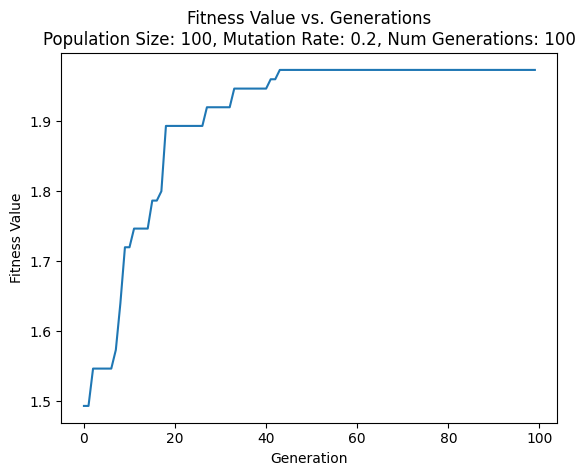

Best solution:
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants
POPULATION_SIZE = 100
CROSSOVER_RATE = 0.8
MUTATION_RATE = 0.2
ELITISM_RATE = 0.1
MAX_GENERATIONS = 100

# Resource allocation problem parameters
num_resources = 5  # vehicles
num_tasks = 10  # customers
resource_limits = np.array([10, 15, 18, 20, 12])  # Maximum availability of each resource
task_requirements = np.random.randint(1, 6, size=(num_tasks, num_resources))

# Generate a random solution
def generate_random_solution():
    population = np.random.randint(0, 2, size=(num_tasks, num_resources))
    return population

# Initialize the fitness function
def evaluate_fitness(solution):
    resource_usage = np.sum(solution * task_requirements, axis=0)
    total_resource_utilization = np.sum(resource_usage) / np.sum(resource_limits)
    return total_resource_utilization

# Apply the genetic operators: selection, crossover, and mutation
def apply_genetic_operators(population):
    # Apply the genetic operators to create a new population
    new_population = []

    # Perform elitism by selecting the best individuals from the current population
    num_elites = int(ELITISM_RATE * POPULATION_SIZE)
    elites = sorted(population, key=lambda x: evaluate_fitness(x), reverse=True)[:num_elites]
    new_population.extend(elites)

    # Perform crossover
    num_crossovers = int((POPULATION_SIZE - num_elites) * CROSSOVER_RATE)
    for _ in range(num_crossovers):
        parent1, parent2 = random.sample(population, 2)
        child = crossover(parent1, parent2)
        new_population.append(child)

    # Perform mutation
    num_mutations = int((POPULATION_SIZE - num_elites) * MUTATION_RATE)
    for _ in range(num_mutations):
        individual = random.choice(population)
        mutated_individual = mutate(individual)
        new_population.append(mutated_individual)

    # Generate remaining individuals randomly
    while len(new_population) < POPULATION_SIZE:
        new_population.append(generate_random_solution())

    return new_population

# Crossover operator: Uniform crossover
def crossover(parent1, parent2):
    child = np.zeros_like(parent1)
    for i in range(num_tasks):
        for j in range(num_resources):
            if random.random() < 0.5:
                child[i][j] = parent1[i][j]
            else:
                child[i][j] = parent2[i][j]
    return child

# Mutation operator: Swap mutation
def mutate(individual):
    mutated_individual = individual.copy()
    resource_idx = random.randint(0, num_resources - 1)
    if np.sum(mutated_individual[:, resource_idx]) > 1:
        idx1, idx2 = random.sample(np.where(mutated_individual[:, resource_idx] == 1)[0].tolist(), 2)
        mutated_individual[idx1][resource_idx], mutated_individual[idx2][resource_idx] = \
            mutated_individual[idx2][resource_idx], mutated_individual[idx1][resource_idx]
    return mutated_individual


# Run the genetic algorithm
def run_genetic_algorithm():
    # Initialize the population
    population = [generate_random_solution() for _ in range(POPULATION_SIZE)]

    # Variables for storing the best solution and fitness value at each generation
    best_fitness_values = []
    best_solutions = []

    # Run the genetic algorithm for the specified number of generations
    for generation in range(MAX_GENERATIONS):
        # Apply the genetic operators
        population = apply_genetic_operators(population)

        # Calculate the fitness values for the current population
        fitness_values = [evaluate_fitness(solution) for solution in population]

        # Find the best solution in the current population
        best_fitness = max(fitness_values)
        best_solution = population[fitness_values.index(best_fitness)]

        # Store the best solution and fitness value at each generation
        best_fitness_values.append(best_fitness)
        best_solutions.append(best_solution)

    # Plot the fitness value vs. generations graph with parameter names and values
    plt.plot(range(MAX_GENERATIONS), best_fitness_values)
    plt.xlabel("Generation")
    plt.ylabel("Fitness Value")
    plt.title(f"Fitness Value vs. Generations\nPopulation Size: {POPULATION_SIZE}, Mutation Rate: {MUTATION_RATE}, Num Generations: {MAX_GENERATIONS}")
    plt.show()

    # Return the final best solution
    return best_solution

# Run the genetic algorithm
best_solution = run_genetic_algorithm()
print("Best solution:")
print(best_solution)
